In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# 4. Evaluation Metrics for Classification

## 4.1 Evaluation metrics: session overview

In [51]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [53]:

df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [54]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [55]:

numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [56]:

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [57]:

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

## 4.2 Accuray and dummy model 

In [58]:
len(y_val)

1409

In [59]:
(y_val == churn_decision).mean()

0.8034066713981547

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(y_val, churn_decision)

0.8034066713981547

In [62]:
import numpy as np

thresholds = np.linspace(0, 1, 21)
scores = [] # This is the list you want to append to

for t in thresholds:
    # Assuming y_pred and y_val are defined elsewhere
    accuracy_score (y_val, y_pred >= 0.5)
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean() # score is a single number (accuracy)
    
    # You also have a small issue with your print statement, 
    # as it's not formatted to take any arguments. 
    # To print the threshold and the score:
    print(f'Threshold: {t:.2f}, Score: {score:.3f}')
    
    # FIX: Append the single score to the list of scores
    scores.append(score) 

# After the loop, the list 'scores' will contain all the calculated accuracies.

Threshold: 0.00, Score: 0.274
Threshold: 0.05, Score: 0.509
Threshold: 0.10, Score: 0.591
Threshold: 0.15, Score: 0.666
Threshold: 0.20, Score: 0.710
Threshold: 0.25, Score: 0.739
Threshold: 0.30, Score: 0.760
Threshold: 0.35, Score: 0.772
Threshold: 0.40, Score: 0.785
Threshold: 0.45, Score: 0.793
Threshold: 0.50, Score: 0.803
Threshold: 0.55, Score: 0.801
Threshold: 0.60, Score: 0.795
Threshold: 0.65, Score: 0.786
Threshold: 0.70, Score: 0.766
Threshold: 0.75, Score: 0.744
Threshold: 0.80, Score: 0.734
Threshold: 0.85, Score: 0.726
Threshold: 0.90, Score: 0.726
Threshold: 0.95, Score: 0.726
Threshold: 1.00, Score: 0.726


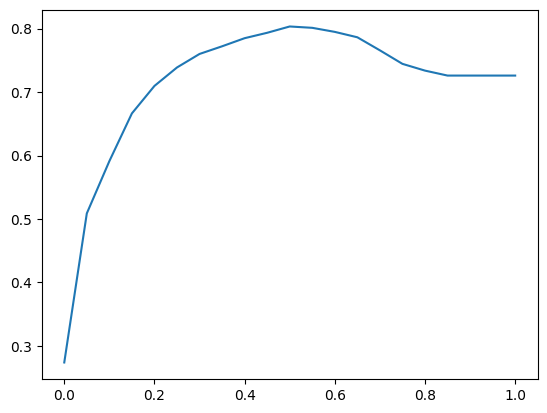

In [63]:
plt.plot(thresholds, scores)

In [64]:
from collections import Counter

In [65]:
Counter(y_pred >= 1.0)

Counter({False: 1409})

In [66]:
1- y_val.mean()

0.7260468417317246

## Confusion Table 

In [67]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [68]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [69]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [70]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [71]:
cofusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

cofusion_matrix

array([[922, 101],
       [176, 210]])

In [72]:
cofusion_matrix / cofusion_matrix.sum()

array([[0.6543648 , 0.07168204],
       [0.12491128, 0.14904187]])

##  4.4 Precision and Recall

In [73]:
p = tp / (tp/fp)
p

101.0

In [74]:
r = tp/(tp+fn)
r

0.5440414507772021

# 4.5 ROC Curves
## TPR and FRP

In [75]:
tpr = tp / (tp + fn)
tpr

0.5440414507772021

In [76]:
fpr = fp / (fp + tn)
fpr

0.09872922776148582

In [77]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [78]:

columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

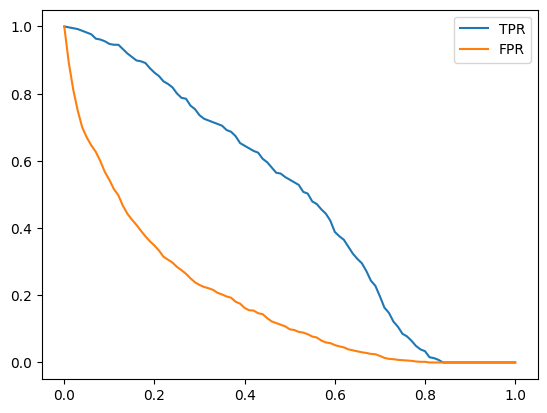

In [79]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

# Random model

In [80]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [81]:

((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [82]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [83]:

df_rand = tpr_fpr_dataframe(y_val, y_rand)

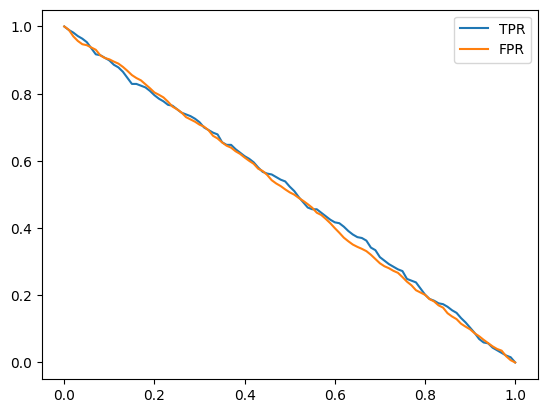

In [84]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

# Ideal Model

In [85]:

num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [86]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

y_ideal_pred = np.linspace(0, 1, len(y_val))

In [87]:

1 - y_val.mean()

0.7260468417317246

In [88]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)

1.0

In [89]:

df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


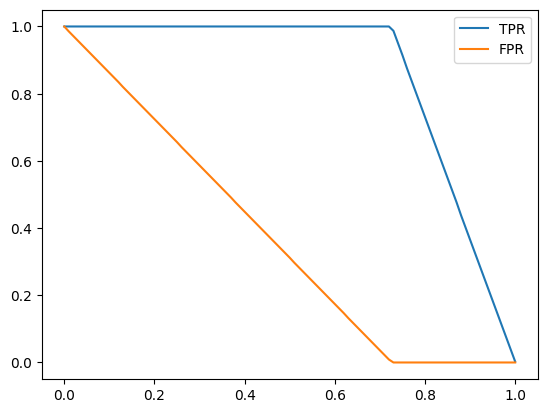

In [90]:

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

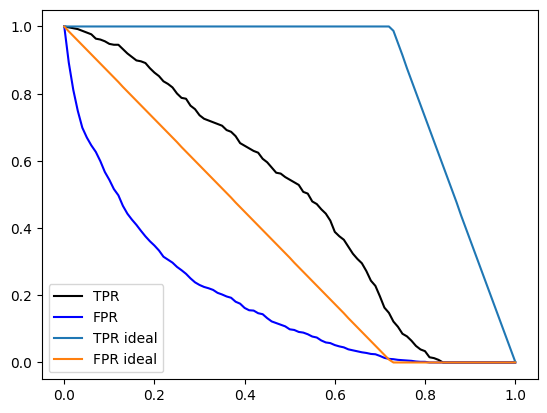

In [91]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='blue')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR ideal')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR random', color='grey')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR random', color='grey')

plt.legend()

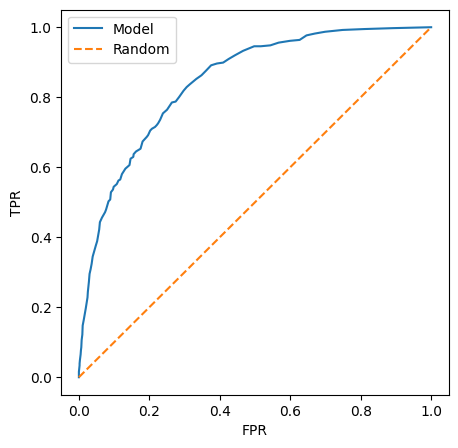

In [92]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()


In [93]:
from sklearn.metrics import roc_curve

In [94]:

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

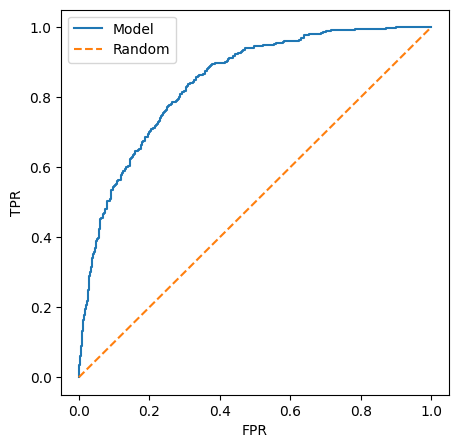

In [95]:

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

# 4.6 ROC AUC

In [96]:

from sklearn.metrics import auc

In [97]:

auc(fpr, tpr)

0.8438429084426076

In [98]:
auc(df_scores.fpr, df_scores.tpr)

0.8437935261017326

In [99]:

auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [100]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8438429084426076

In [101]:
from sklearn.metrics import roc_auc_score

In [102]:

roc_auc_score(y_val, y_pred)

0.8438429084426076

In [103]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [104]:
import random

In [105]:

n = 100000
success = 0 

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.84307

In [106]:
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

0.84648

# 4.7 Cross-Validation

In [107]:

def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [108]:

dv, model = train(df_train, y_train, C=0.001)

In [109]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [110]:

y_pred = predict(df_val, dv, model)

In [111]:
from sklearn.model_selection import KFold

In [112]:
!pip install tqdm

In [113]:
from tqdm.auto import tqdm

In [114]:

n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.009
C=0.1 0.841 +- 0.008
C=0.5 0.840 +- 0.007
C=1 0.840 +- 0.008
C=5 0.841 +- 0.008
C=10 0.841 +- 0.008


In [115]:
scores

[0.8423554254225181,
 0.8455812971791816,
 0.8325827814569536,
 0.8320110155400653,
 0.8526285651532741]

In [116]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259